# Intro to Spectral Analysis  
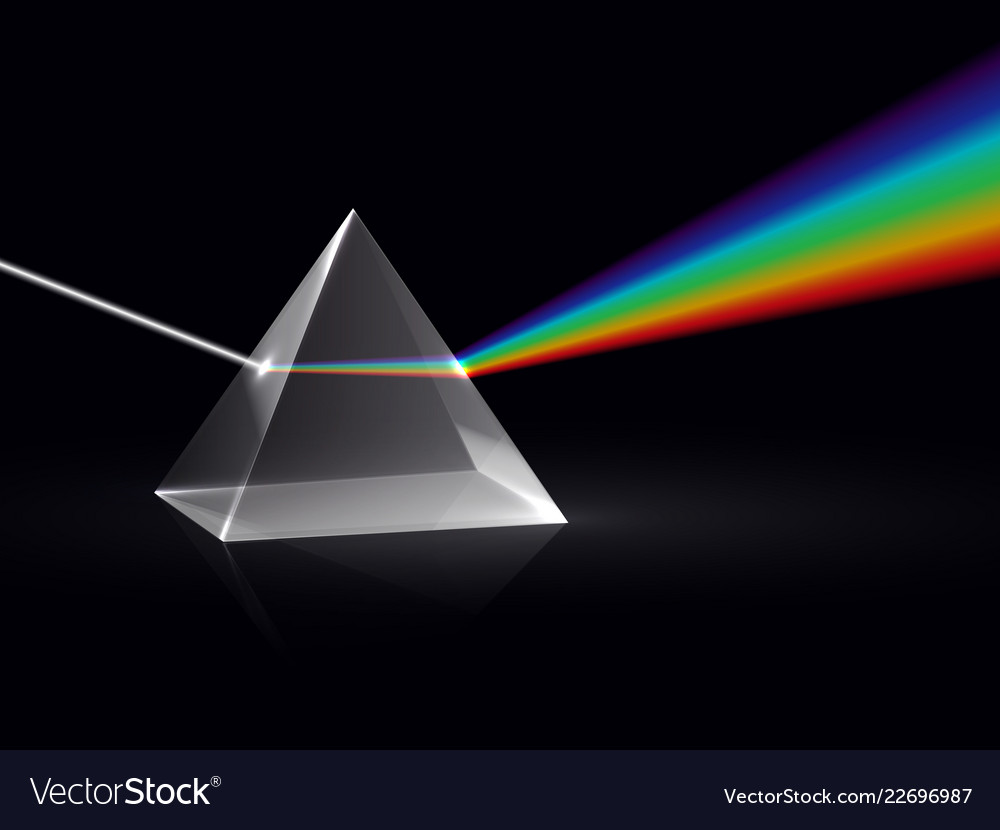
## Module 1: Fourier Series — Representing Periodic Signals

The **Fourier Series** decomposes a **periodic function** into a sum of **sines and cosines** (or complex exponentials). It answers the question:

> "What pure tones (frequencies) add up to create this periodic signal?"

---
### Trigonometric background
The **sine wave** is the most fundamental building block in signal processing and Fourier analysis. It represents a smooth, periodic oscillation and is defined by the equation:

$$
A \sin(2\pi f t + \phi)
$$
Where:

- $A$ is the **amplitude**
- $f$ is the **frequency** (Hz)
- $t$ is **time**
- $\phi$ is the **phase shift**
- $T$ defined by $\frac{1}{f}$ is period.

Sine waves are **pure tones**: they contain energy at only one frequency. 

### Fourier Series: Real Form

Given a **periodic** function $f(t)$ with period $T$, the Fourier series is:

$$
f(t) = a_0 + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right]
$$

Where the Fourier coefficients are given by:

$$
a_0 = \frac{1}{T} \int_{0}^{T} f(t) \, dt
$$

$$
a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) \, dt
$$

$$
b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) \, dt
$$

---

### Complex Exponential Form

Alternatively, using Euler’s identity $e^{i\theta} = \cos\theta + i\sin\theta$, we can write:

$$
f(t) = \sum_{n=-\infty}^{\infty} c_n \, e^{i 2\pi n t / T}
$$

Where:

$$
c_n = \frac{1}{T} \int_0^T f(t) \, e^{-i 2\pi n t / T} \, dt
$$

This form is compact and widely used in signal processing and theoretical analysis.

---

### Notes:  
- The Fourier Series only applies to **periodic** functions.
- It transforms a time-domain function into a **frequency-domain representation**.
- Each term corresponds to a **harmonic** of the fundamental frequency $f_0 = \frac{1}{T}$.
- The coefficients $a_n$, $b_n$ (or $c_n$) tell us **how much** of each frequency is present.  
- $\cos\left(\frac{2\pi n t}{T}\right)$ and $\sin\left(\frac{2\pi n t}{T}\right)$ are a set of orthogonal base in the function space.  
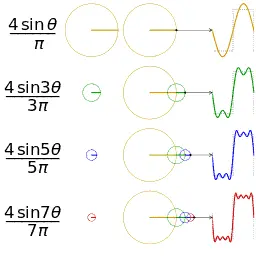  
---

### Practical Application

The Fourier Series is the foundation of:

- Signal compression (e.g., MP3)
- Audio synthesis
- Solving PDEs (heat, wave equations)
- Filtering and noise reduction

---

### Practice:  
We'll compute and visualize the Fourier series approximation of a square wave using Python.  
$$
f(t) = 
\begin{cases}
1, & 0 \le t < \pi \\
-1, & \pi \le t < 2\pi \\
\text{periodic with } f(t + 2\pi) = f(t)
\end{cases}
$$

In [3]:
#fourier transform of a square wave, calculate the Fourier coefficients one by one
#initialize the parameters
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
T = 2 * np.pi  # period of the square wave
def square_wave(t):
    t_mod = t % T  
    return np.where(t_mod < np.pi, 1, -1)
N = 50  # number of harmonics to consider

w_n = [n * (2 * np.pi / T) for n in range(0, N + 1)]  # angular frequencies
a_n = [0] * (N + 1)  # cosine coefficients
b_n = [0] * (N + 1)  # sine coefficients
a_n[0] = 0  # a_0 is zero for the square wave
#use integration to calculate the Fourier coefficients
#here we can mannually get the precise value of the coefficients
#however, to make it more general, we can use numerical integration from scipy
for n in range(1, N + 1):
    a_n[n] = (2 / T) * quad(lambda t: square_wave(t) * np.cos(w_n[n] * t), 0, T)[0]
    b_n[n] = (2 / T) * quad(lambda t: square_wave(t) * np.sin(w_n[n] * t), 0, T)[0]


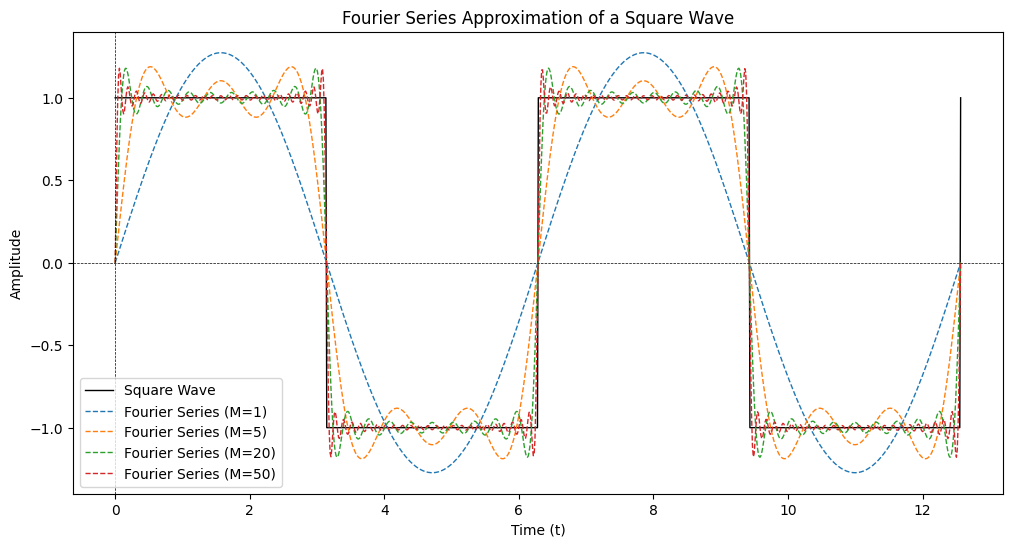

In [4]:

# Now let's visualize the Fourier series approximation
t = np.linspace(0, 4 * np.pi, 1000)  #
def fourier_series(t, M=N):
    series = np.zeros_like(t)
    for n in range(1, M + 1):
        series += a_n[n] * np.cos(w_n[n] * t) + b_n[n] * np.sin(w_n[n] * t)
    return series+a_n[0]
# Now visualize different orders of Fourier series approximation
plt.figure(figsize=(12, 6))
plt.plot(t, square_wave(t), label='Square Wave', color='black', linewidth=1)
for m in (1, 5, 20, 50):
    plt.plot(t, fourier_series(t, M=m), label=f'Fourier Series (M={m})', linestyle='--', linewidth=1)
plt.title('Fourier Series Approximation of a Square Wave')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()


## Module 2: From Fourier Series to Fourier Transform

Using **Fourier Series**, we get frequency components and thier amplitudes for a periodic function, but how about any functions (like real-world signals) that may not necessarily be periodic? We can derive the **Fourier Transform** by taking the limit of the **Fourier Series** as the period goes to infinity.

---

### 1. Introduce the frequency variable

Using the complex form of the Fourier series from **Module 1**:  
$$
f(t) = \sum_{n=-\infty}^{\infty} c_n \, e^{i 2\pi n t / T}
$$

Where:

$$
c_n = \frac{1}{T} \int_0^T f(t) \, e^{-i 2\pi n t / T} \, dt
$$  
let 
$$
\omega_n = n \omega_0 = \frac{2\pi n}{T}
$$  
- $\omega_0 = \frac{2\pi}{T}$ is the fundamental angular frequency  
Then the series becomes:

$$
f(t) = \sum_{n=-\infty}^{\infty} \left( \frac{1}{T} \int_{-T/2}^{T/2} f(\tau) e^{-i \omega_n \tau} \, d\tau \right) e^{i \omega_n t}
$$

---


Define:

$$
F(\omega_n) = \int_{-T/2}^{T/2} f(\tau) e^{-i \omega_n \tau} \, d\tau
$$

So the series becomes:

$$
f(t) = \sum_{n=-\infty}^{\infty} \frac{F(\omega_n)}{T} e^{i \omega_n t}
$$

---

### 2. Take the limit as $T \to \infty$
> Remeber the definition of a definite integral, then we have for any integrable function $f$:
$$
\int_{a}^{b} f(t) dt = \lim_{N \to \infty} \sum_{n=0}^{N} f(a+\frac{b-a}{N}n).\frac{b-a}{N}
$$  
> note, this is not a formal proof of Fourier transformation, because Fourier analysis is defined on Lebesgue measure. However, the Riemann integration helps simplify the inference and doesn't hurt the final conclusion.  

As $T \to \infty$, the sum becomes an integral, (remember $\frac{1}{T} = \frac{\omega_0}{2\pi}$):

$$
f(t) = \lim_{T \to \infty} \sum_{n=-\infty}^{\infty} \frac{F(\omega_n)}{T} e^{i \omega_n t}
\approx \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \, d\omega
$$

This is the **inverse Fourier transform**:

$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \, d\omega
$$

And the **Fourier transform** is:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} \, dt
$$

---

### Summary Table

| Concept | Expression |
|--------|------------|
| Fourier Coefficient (periodic) | $c_n = \frac{1}{T} \int_{-T/2}^{T/2} f(t) e^{-i n \omega_0 t} \, dt$ |
| Fourier Series | $f(t) = \sum_{n=-\infty}^{\infty} c_n e^{i n \omega_0 t}$ |
| Fourier Transform | $F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i \omega t} \, dt$ |
| Inverse Fourier Transform | $f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \, d\omega$ |

---

This derivation bridges the gap between the analysis of **periodic** and **non-periodic** signals, and forms the foundation of modern signal processing.

> Note:  
>Periodic functions have discrete Fourier transforms, while non-periodic ones have continuous transforms.  
>Fourirer transform keeps inner product (power).


## Module 3: Discrete Fourier Transform (DFT)

In real life, we can only have a **finite number of data points**, such as from measurements or digital sampling, we can no longer apply the continuous or infinite Fourier series. Instead, we use the **Discrete Fourier Transform (DFT)** to estimate the true Fourier transform.

---

### Basic ideas

Given $N$ equally spaced samples of a function $f(t)$, denoted as:

$$
f_0, f_1, f_2, \dots, f_{N-1}
$$

The fundamental frequency for the signal will be $\frac{2\pi}{N}$ (ignore step size, and assume the function has period N, ($N\Delta t$)), and the highest frequency should not exceed sampling frequency, i.e. $2\pi$. As a result, we can only consider frequency in bewtween, other frequencies would not help analyzing the initial signal.
**DFT** transforms these time-domain samples into frequency-domain components using:

DFT frequencies:  
$$
\omega_k = \frac{2\pi k}{N} \quad \text
{for } k = 0, 1, \dots, N-1
$$  
Using discrete samples of a function $f(t)$ to estimate integration of 
$$
c_n = \frac{1}{T} \int_0^T f(t) \, e^{-i 2\pi n t / T} \, dt
$$  
we have:  
$$
F_k \approx \sum_{n=0}^{N-1} f_n \cdot e^{-2\pi \frac{nk}{N} i} \quad \text{for } k = 0, 1, \dots, N-1
$$

- $f_n$: the $n$-th sampled value in time
- $F_k$: the $k$-th complex frequency component

This formula assumes the signal is **periodic with period $N$** and represents it as a sum of complex exponentials.

---

### Inverse DFT (IDFT)

We can recover the time-domain signal using the inverse transform:

$$
f(t) \approx \frac{1}{N} \sum_{k=0}^{N-1} F_k \cdot e^{2\pi i\frac{k}{N} t} 
$$

---

### Interpretation

- The DFT gives us a **finite** set of frequencies (discrete spectrum).
- Frequencies are equally spaced: 0 (mean of signal), $\frac{1}{N}, \frac{2}{N}, \dots, \frac{N-1}{N}$ (in cycles/sample).
- The output $F_k$ is complex: the magnitude $|F_k|$ gives the amplitude, and $\arg(F_k)$ gives the phase of the frequency component.

---

### Fast Fourier Transform (FFT)

In practice, we almost always compute DFT using an efficient algorithm called the **Fast Fourier Transform (FFT)**, implemented as `scipy.fft.fft()` in Python. 
The results are the same as DFT.


(512,)


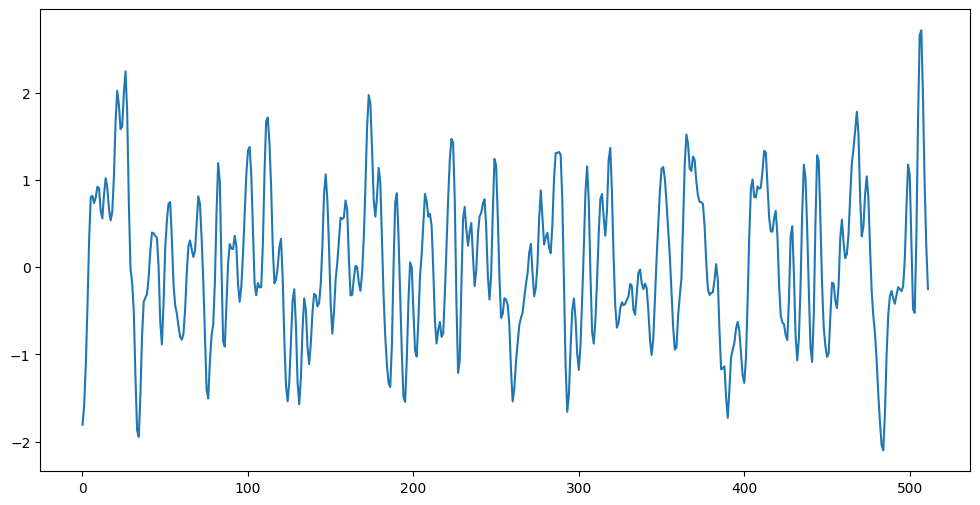

In [11]:
import numpy as np, scipy.io
from scipy.fft import fft, fftfreq

# Load the MATLAB EEG signal
data = scipy.io.loadmat('NewEEGSignal.mat')
eeg = data['NewEEGSignal'].squeeze()  
print(eeg.shape)
fs = 256

plt.figure(figsize=(12, 6))
plt.plot(eeg)

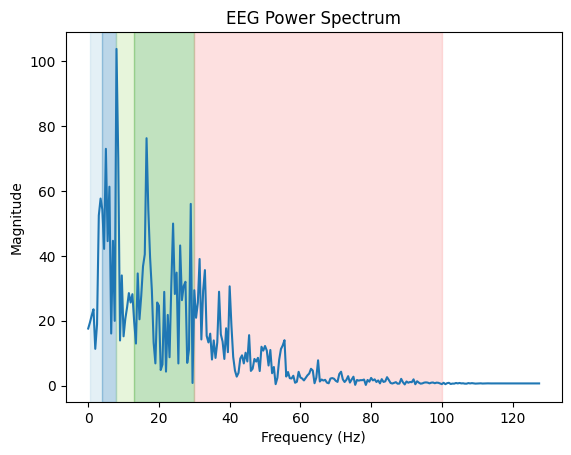

In [12]:
# Compute DFT
N = len(eeg)
F = fft(eeg)
freqs = fftfreq(N, d=1/fs)

# Plot magnitude spectrum
import matplotlib.pyplot as plt
plt.figure()
plt.plot(freqs[:N//2], np.abs(F)[:N//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('EEG Power Spectrum')

# Conventional brain wave bands
bands = {
    '$\Delta$ (0.5–4 Hz)': (0.5, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13),
    'Beta (13–30 Hz)': (13, 30),
    'Gamma (30–100 Hz)': (30, 100)
}

colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99']

#some convetional band divisions
for (label, (low, high)), color in zip(bands.items(), colors):
    plt.axvspan(low, high, color=color, alpha=0.3, label=label)

plt.show()

## Filtering signals 
### By frequency
| Filter Type   | Description                                | Example Use Case                |
| ------------- | ------------------------------------------ | ------------------------------- |
| **Low-Pass**  | Passes frequencies **below** a cutoff      | Smoothing, denoising            |
| **High-Pass** | Passes frequencies **above** a cutoff      | Removing slow drifts (e.g., DC) |
| **Band-Pass** | Passes frequencies **within a range**      | EEG alpha band (8–13 Hz)        |
| **Band-Stop** | Blocks frequencies **within a range**      | Notch filtering (e.g., 60 Hz)   |
| **All-Pass**  | Passes **all** frequencies (phase shaping) | Phase correction                |
| **Notch filter**  | Attenuates a very narrow frequency band (e.g. 60 Hz line noise) | Removing regular noise                |

### By filter design  
| Filter Name                         | Characteristics                                                 | Trade-Offs                             |
| ----------------------------------- | --------------------------------------------------------------- | -------------------------------------- |
| **Butterworth**                     | Maximally flat in passband                                      | Smooth roll-off, slower cutoff         |
| **Chebyshev Type I**                | Ripple in passband, sharper cutoff than Butterworth             | Passband ripple                        |
| **Chebyshev Type II**               | No ripple in passband, ripple in stopband                       | Sharper transition than Type I         |
| **FIR (Finite Impulse Response)**   | Always stable, **linear phase** (if symmetric taps)                 | Requires more taps for sharp cutoff    |
| **IIR (Infinite Impulse Response)** | More efficient, mimics analog filters (Butterworth, etc.)       | Can have phase distortion, instability |



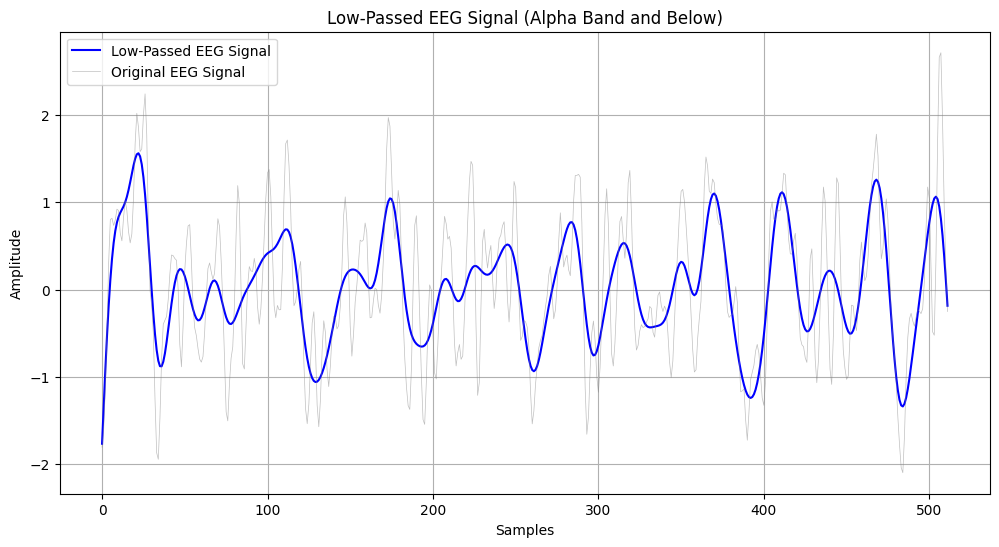

In [14]:
#now we'll apply low-pass filter to the EEG signal to only keep alpha band and below
nyq = 0.5 * fs
high = 13  # Hz
norm_cutoff = high / nyq 
b, a = butter(4, norm_cutoff, btype='low', analog=False)
eeg_lowpassed = filtfilt(b, a, eeg)
#filtfilt applies the filter forward and backward, removing phase shifts, so the peaks stay aligned in time.
plt.figure(figsize=(12, 6))
plt.plot(eeg_lowpassed, color='blue', label='Low-Passed EEG Signal')
plt.plot(eeg, color='gray', alpha=0.5, label='Original EEG Signal', linewidth=0.5)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Low-Passed EEG Signal (Alpha Band and Below)')
plt.legend()
plt.grid()

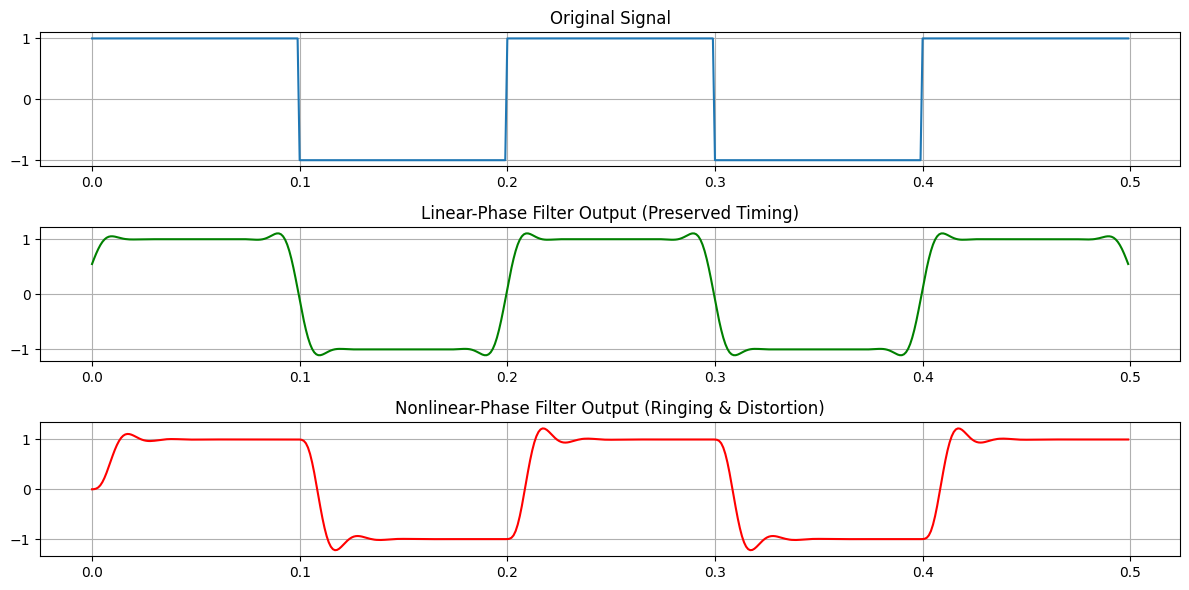

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, firwin, square

# initialize square wave
fs = 500 
t = np.linspace(0, 0.5, fs, endpoint=False)
square_wave = square(2 * np.pi * 5 * t)  # 5 Hz square wave

# Linear-phase FIR filter (symmetric)
# Keeps frequencies below 0.1*sampling rate
fir_kernel = firwin(numtaps=51, cutoff=0.1, window='hamming')
linear_filtered = np.convolve(square_wave, fir_kernel, mode='same')

# Nonlinear-phase IIR filter (Butterworth)
b, a = butter(N=4, Wn=0.1)
nonlinear_filtered = lfilter(b, a, square_wave)

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, square_wave, label='Original Square Wave')
plt.title('Original Signal')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, linear_filtered, label='Linear-Phase FIR Filter', color='green')
plt.title('Linear-Phase Filter Output (Preserved Timing)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, nonlinear_filtered, label='Nonlinear-Phase IIR Filter', color='red')
plt.title('Nonlinear-Phase Filter Output (Ringing & Distortion)')
plt.grid(True)

plt.tight_layout()
plt.show()
#The linear-phase FIR filter smooths the edges but keeps transitions aligned.
#The nonlinear-phase IIR filter causes ringing and delayed transitions, showing phase distortion.

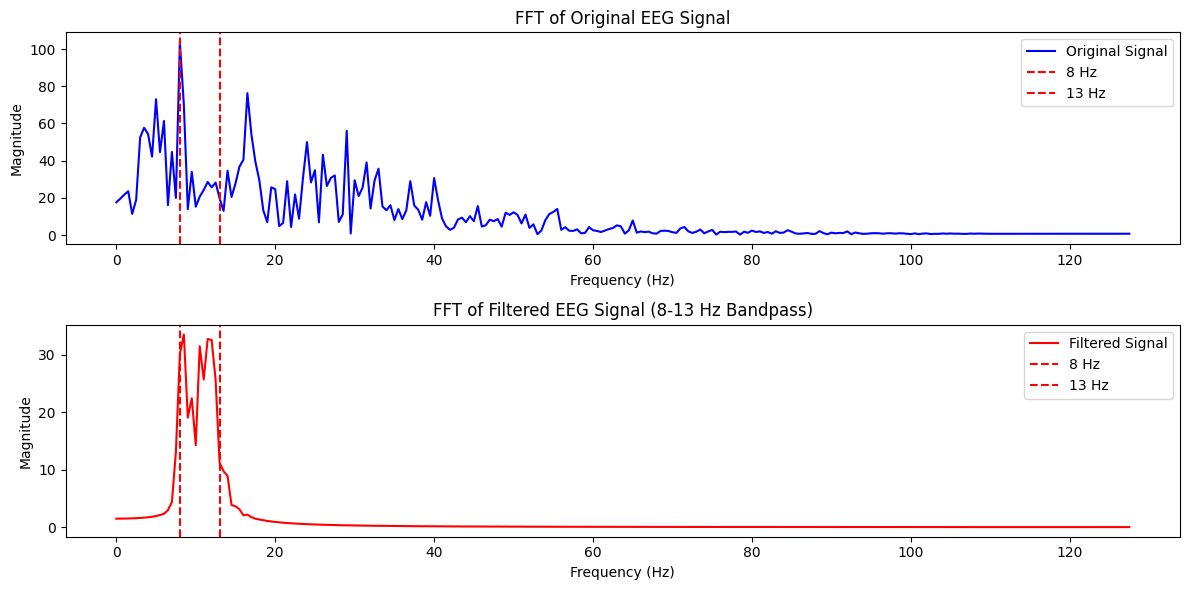

In [ ]:
from scipy.signal import butter, filtfilt

# Original signal FFT
F_orig = fft(eeg)

# FFT after bandpass filtering (8-13 Hz)
b, a = butter(4, [8, 13], btype='bandpass', fs=fs)
eeg_filtered = filtfilt(b, a, eeg)
F_filtered = fft(eeg_filtered)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs[:N//2], np.abs(F_orig)[:N//2], label='Original Signal', color='blue')
plt.title('FFT of Original EEG Signal')
plt.axvline(8, color='red', linestyle='--', label='8 Hz')
plt.axvline(13, color='red', linestyle='--', label='13 Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.abs(F_filtered)[:N//2], label='Filtered Signal', color='red')
plt.axvline(8, color='red', linestyle='--', label='8 Hz')
plt.axvline(13, color='red', linestyle='--', label='13 Hz')
plt.title('FFT of Filtered EEG Signal (8-13 Hz Bandpass)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
